<h3>Data Processing With Scikit Learn</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 8]
sns.set_style('darkgrid')

In [2]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head(30)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
titanic_data = titanic_data[['age', 'fare', 'pclass']]
titanic_data.head(30)

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3
5,NaN,8.4583,3
6,54.0,51.8625,1
7,2.0,21.0750,3
8,27.0,11.1333,3
9,14.0,30.0708,2


In [4]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


<p>Standard Scaling</p>

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [7]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


<Axes: xlabel='age', ylabel='Density'>

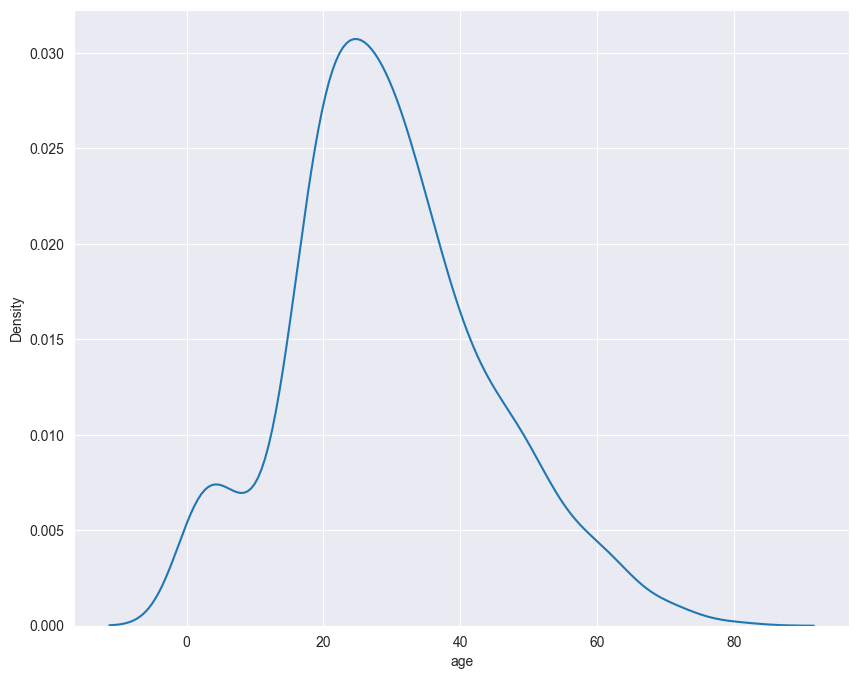

In [8]:
sns.kdeplot(titanic_data['age'])

<Axes: xlabel='age', ylabel='Density'>

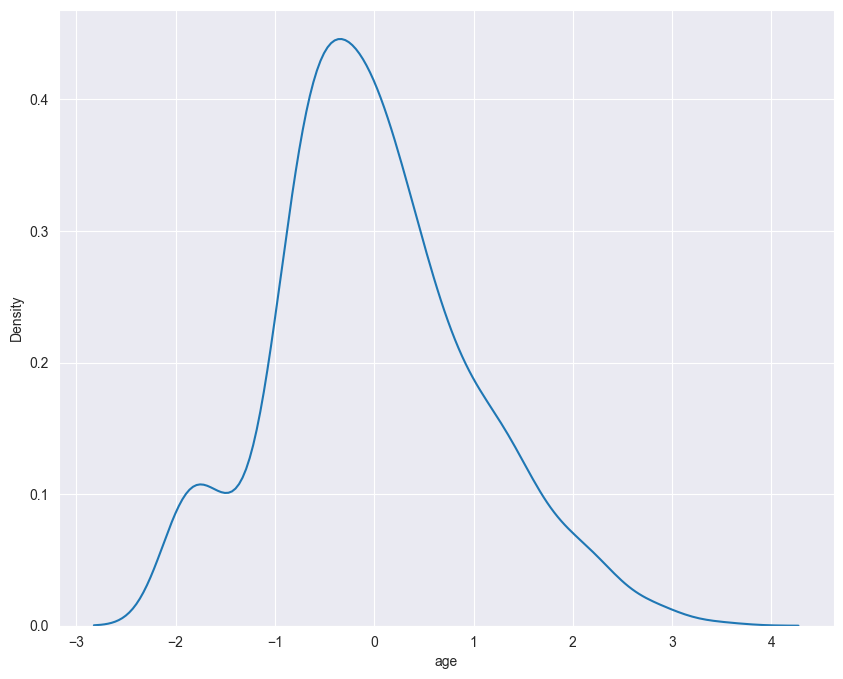

In [9]:
sns.kdeplot(titanic_data_scaled['age'])

<p>Min/Max Scaling</p>

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
scaler.fit(titanic_data)
titanic_data_scaled = scaler.transform(titanic_data)

In [12]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head(30)

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0
5,NaN,0.016510,1.0
6,0.673285,0.101229,0.0
7,0.019854,0.041136,1.0
8,0.334004,0.021731,1.0
9,0.170646,0.058694,0.5


<Axes: xlabel='age', ylabel='Density'>

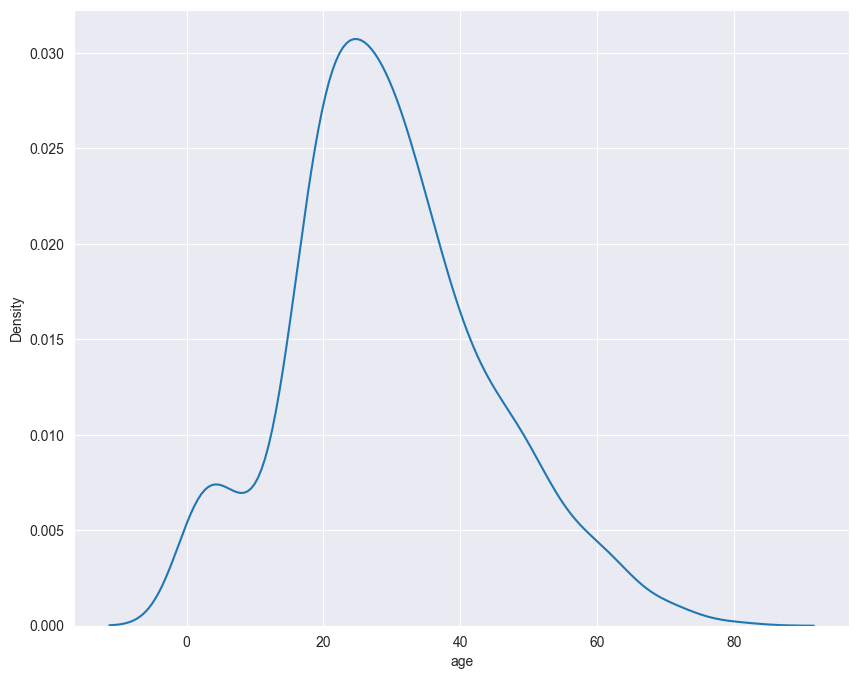

In [13]:
sns.kdeplot(titanic_data['age'])

<Axes: xlabel='age', ylabel='Density'>

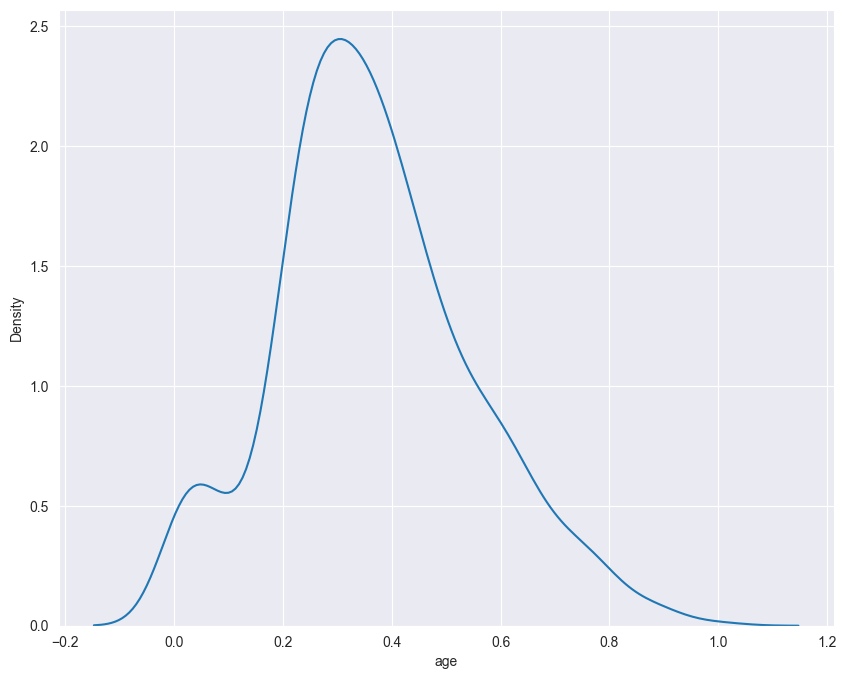

In [14]:
sns.kdeplot(titanic_data_scaled['age'])

<p>Mean Normalization</p>

In [15]:
mean_vals = titanic_data.mean(axis=0)
mean_vals

age       29.699118
fare      32.204208
pclass     2.308642
dtype: float64

In [16]:
range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)
range_vals

age        79.5800
fare      512.3292
pclass      2.0000
dtype: float64

In [17]:
titanic_data_scaled = (titanic_data - mean_vals) / range_vals
titanic_data_scaled.head(30)

,age,fare,pclass
0,-0.096747,-0.048707,0.345679
1,0.104309,0.076277,-0.654321
2,-0.046483,-0.047390,0.345679
3,0.066611,0.040786,-0.654321
4,0.066611,-0.047146,0.345679
5,NaN,-0.046349,0.345679
6,0.305364,0.038370,-0.654321
7,-0.348066,-0.021723,0.345679
8,-0.033917,-0.041128,0.345679
9,-0.197275,-0.004164,-0.154321


<Axes: xlabel='age', ylabel='Density'>

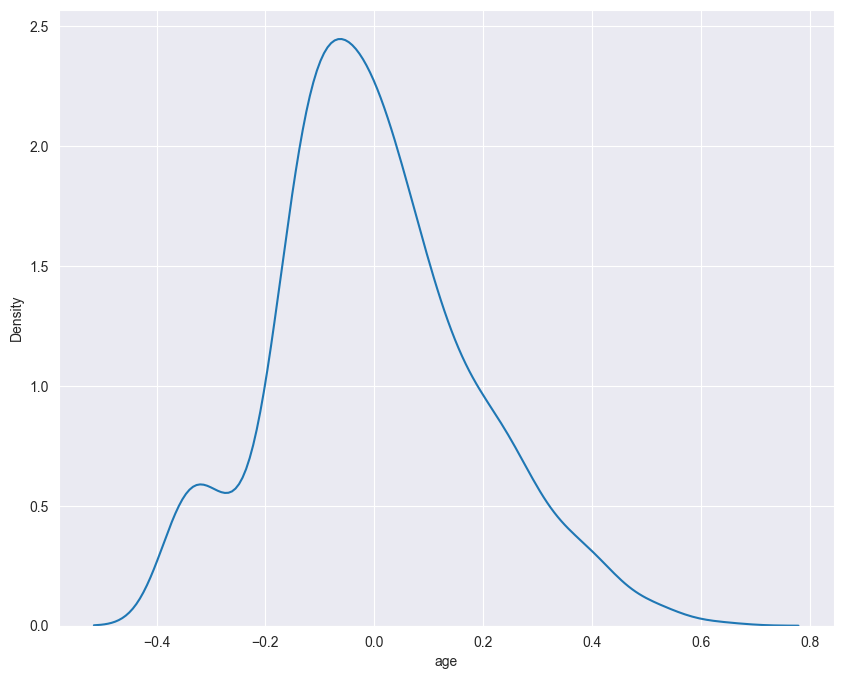

In [18]:
sns.kdeplot(titanic_data_scaled['age'])

<h5>Handling Missing Values</h5>

<p>Mean Or Median Imputation</p>

In [19]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head(30)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [20]:
titanic_data = titanic_data[['survived', 'pclass', 'age', 'fare']]
titanic_data.head(30)

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
5,0,3,NaN,8.4583
6,0,1,54.0,51.8625
7,0,3,2.0,21.0750
8,1,3,27.0,11.1333
9,1,2,14.0,30.0708


In [21]:
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [22]:
median = titanic_data.median()

median

survived     0.0000
pclass       3.0000
age         28.0000
fare        14.4542
dtype: float64

In [23]:
mean = titanic_data.mean()
mean

survived     0.383838
pclass       2.308642
age         29.699118
fare        32.204208
dtype: float64

In [24]:
import numpy as np

titanic_data['Median_Age'] = titanic_data.age.fillna(median)

titanic_data['Mean_Age'] = titanic_data.age.fillna(mean)

titanic_data['Mean_Age'] = np.round(titanic_data['Mean_Age'],1)

titanic_data.head(30)

,survived,pclass,age,fare,Median_Age,Mean_Age
0,0,3,22.0,7.2500,22.0,22.0
1,1,1,38.0,71.2833,38.0,38.0
2,1,3,26.0,7.9250,26.0,26.0
3,1,1,35.0,53.1000,35.0,35.0
4,0,3,35.0,8.0500,35.0,35.0
5,0,3,NaN,8.4583,NaN,NaN
6,0,1,54.0,51.8625,54.0,54.0
7,0,3,2.0,21.0750,2.0,2.0
8,1,3,27.0,11.1333,27.0,27.0
9,1,2,14.0,30.0708,14.0,14.0


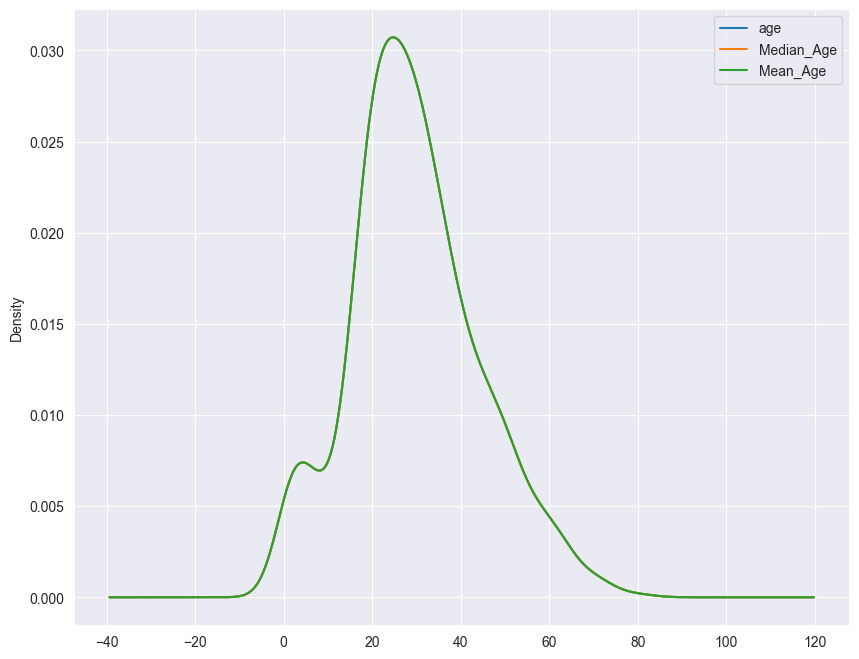

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'].plot(kind='kde', ax=ax)
titanic_data['Median_Age'].plot(kind='kde', ax=ax)
titanic_data['Mean_Age'].plot(kind='kde', ax=ax)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<p>End of Distribution Imputation</p>

In [26]:
titanic_data = sns.load_dataset('titanic')

In [27]:
titanic_data = titanic_data[['survived', 'pclass', 'age', 'fare']]
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

<Axes: >

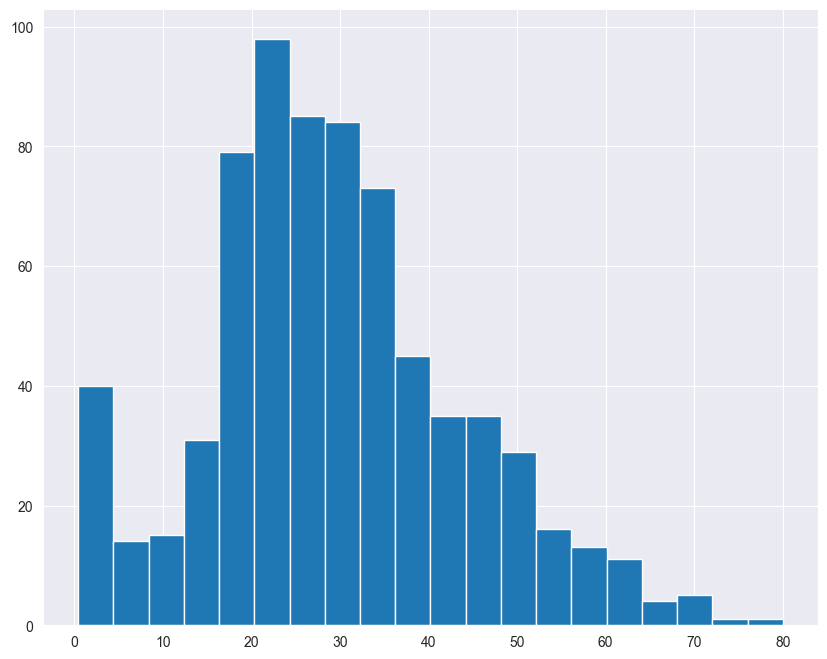

In [28]:
titanic_data.age.hist(bins=20)

In [29]:
eod_value = titanic_data.age.mean() + 3 * titanic_data.age.std()
eod_value

73.27860964406094

In [30]:
titanic_data['age_eod'] = titanic_data.age.fillna(eod_value)
titanic_data.head(30)

,survived,pclass,age,fare,age_eod
0,0,3,22.0,7.2500,22.00000
1,1,1,38.0,71.2833,38.00000
2,1,3,26.0,7.9250,26.00000
3,1,1,35.0,53.1000,35.00000
4,0,3,35.0,8.0500,35.00000
5,0,3,NaN,8.4583,73.27861
6,0,1,54.0,51.8625,54.00000
7,0,3,2.0,21.0750,2.00000
8,1,3,27.0,11.1333,27.00000
9,1,2,14.0,30.0708,14.00000


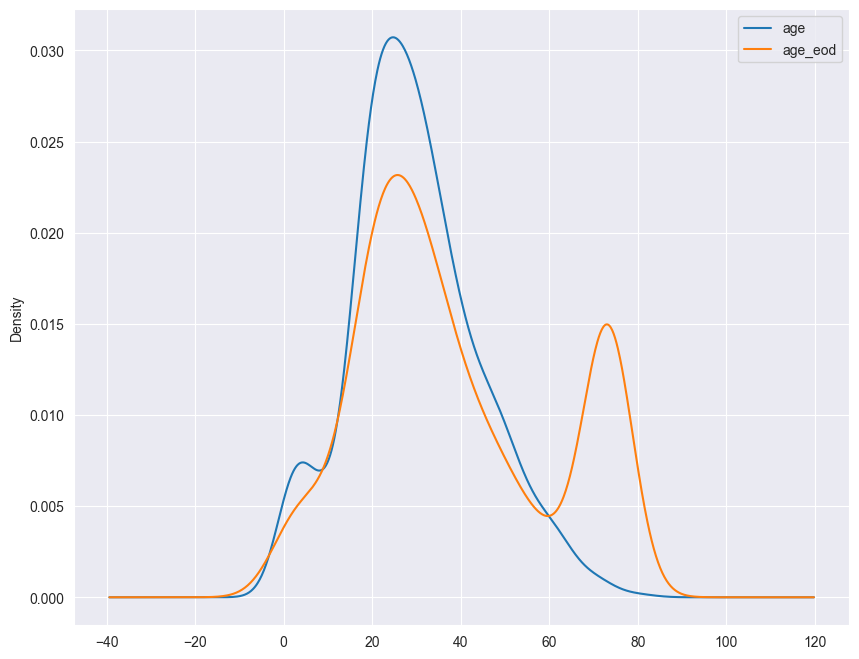

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'].plot(kind='kde', ax=ax)
titanic_data['age_eod'].plot(kind='kde', ax=ax)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<p>Frequent Category Imputation</p>

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 8)
sns.set_style("darkgrid")

In [33]:
titanic_data = sns.load_dataset('titanic')
titanic_data = titanic_data[['embark_town', 'age', 'fare']]
titanic_data.head(30)

,embark_town,age,fare
0,Southampton,22.0,7.2500
1,Cherbourg,38.0,71.2833
2,Southampton,26.0,7.9250
3,Southampton,35.0,53.1000
4,Southampton,35.0,8.0500
5,Queenstown,NaN,8.4583
6,Southampton,54.0,51.8625
7,Southampton,2.0,21.0750
8,Southampton,27.0,11.1333
9,Cherbourg,14.0,30.0708


In [34]:
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64